In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.gridspec as gridspec
import itertools
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
train = pd.read_csv("training.csv", delimiter = ",")
astra_test = pd.read_csv("testing.csv",  delimiter = ",")

In [4]:
train.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [5]:
train.shape

(16625, 16)

In [6]:
train.isnull().sum()

ID           0
LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
TARGET       0
dtype: int64

Hasil dari dataset train tidak memiliki NaN atau missing values, sehingga cocok untuk dilanjutkan analisa terhadap datasetnya.

In [7]:
train["TARGET"].value_counts()/len(train)

0    0.600842
1    0.399158
Name: TARGET, dtype: float64

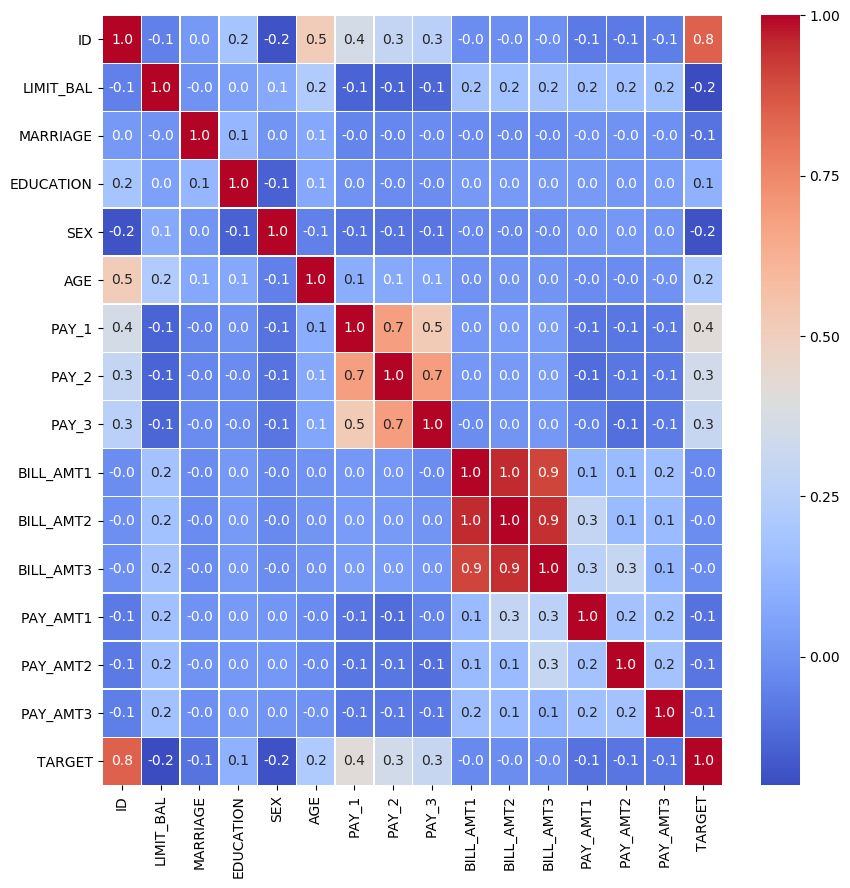

In [8]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=.3, fmt= '.1f',cmap = "coolwarm");
plt.show()

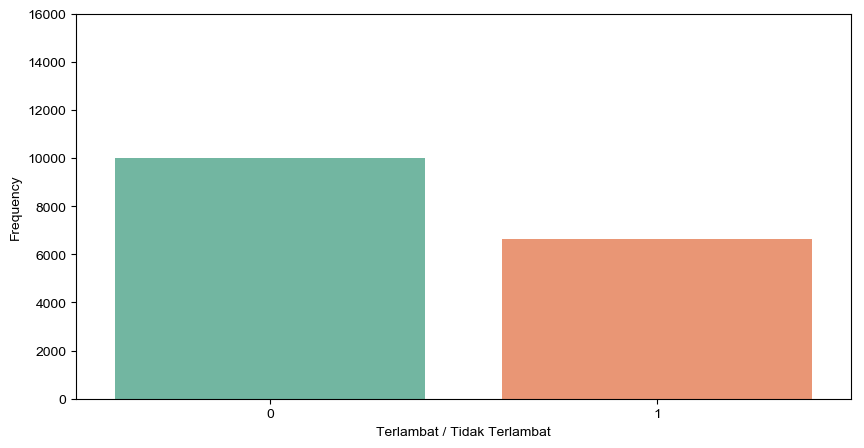

In [9]:
ax = sns.countplot(x = train.TARGET ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_ylim(top = 15000)
ax.set_xlabel('Terlambat / Tidak Terlambat')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=16000)

plt.show()

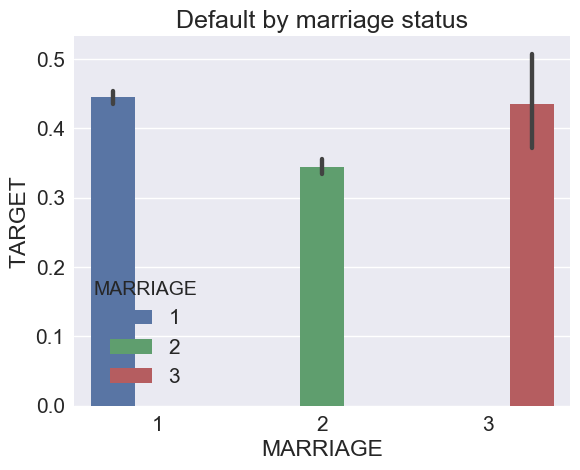

In [10]:
train.loc[train['MARRIAGE'] == 0, 'MARRIAGE'] = 3
sns.barplot(x="MARRIAGE", y="TARGET", hue="MARRIAGE", data=train)
plt.title("Default by marriage status");
plt.show()

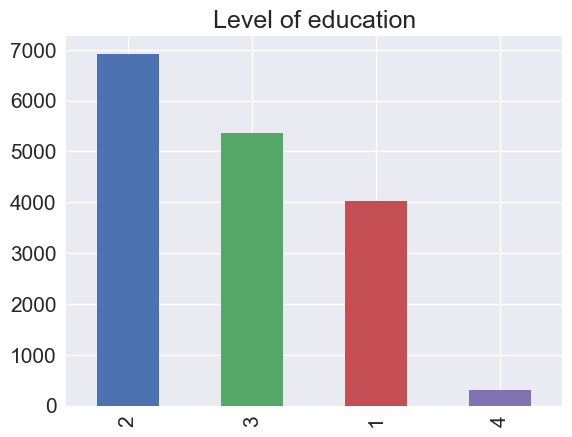

In [11]:
train.loc[train['EDUCATION'] == 6, 'EDUCATION'] = 4
train.loc[train['EDUCATION'] == 5, 'EDUCATION'] = 4
train.loc[train['EDUCATION'] == 0, 'EDUCATION'] = 4
labels = ('random set 1', 'random set 2')
train["EDUCATION"].value_counts().plot(kind="bar")
plt.title("Level of education");
plt.show()

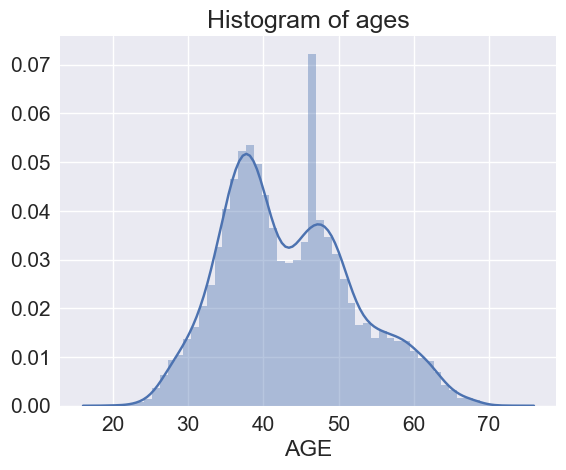

In [12]:
sns.distplot(train['AGE'].dropna())
plt.title("Histogram of ages");
plt.show()

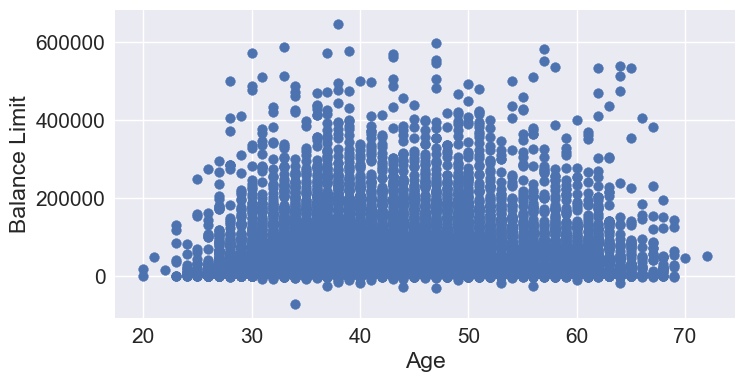

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(train['AGE'],train['BILL_AMT2'])
ax.set_xlabel('Age')
ax.set_ylabel('Balance Limit')
plt.show();

In [14]:
train.rename(columns={'TARGET': 'Default'}, inplace=True)
col = train.loc[: , "BILL_AMT1":"BILL_AMT3"]
train['RATA_BILL'] = col.mean(axis=1)
col2 = train.loc[: , "PAY_AMT1":"PAY_AMT3"]
train['RATA_PAY'] = col2.mean(axis=1)

In [15]:
# This rocCurve plot will help us later with comparing classifiers
def rocCurve(aClf,X_test,y_test,modelName):
    roc_auc = roc_auc_score(y_test, aClf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, aClf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Luas area bawah kurva = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Plot')
    plt.legend(loc="lower right")
    plt.show()

## Random Forest

In [16]:
X = train[["AGE","EDUCATION","PAY_1","PAY_2","PAY_3"]]
y = train['Default']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

In [18]:
clf = RandomForestClassifier(random_state=20)

In [19]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [20]:
y_pred = clf.predict(X_test)
lr_scores = clf.score(X_test, y_test)
lr_scores

0.7866880513231757

In [21]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2725  325]
 [ 739 1199]]


In [22]:
print('Akurasi dari model Random Forest adalah sebesar: {:.3f}'.format(clf.score(X_test, y_test)))

Akurasi dari model Random Forest adalah sebesar: 0.787


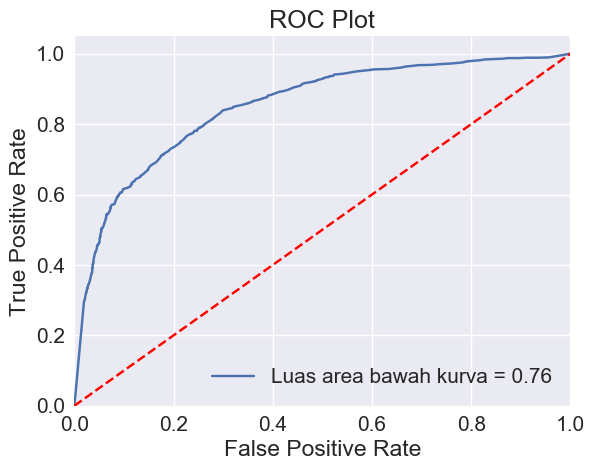

In [23]:
rocCurve(clf,X_test,y_test, modelName ="Random Forest")

## Support Vector Machine

In [24]:
svm_clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [25]:
print('Akurasi dari model SVM adalah: {:.3f}'.format(svm_clf.score(X_test, y_test)))

Akurasi dari model SVM adalah: 0.799


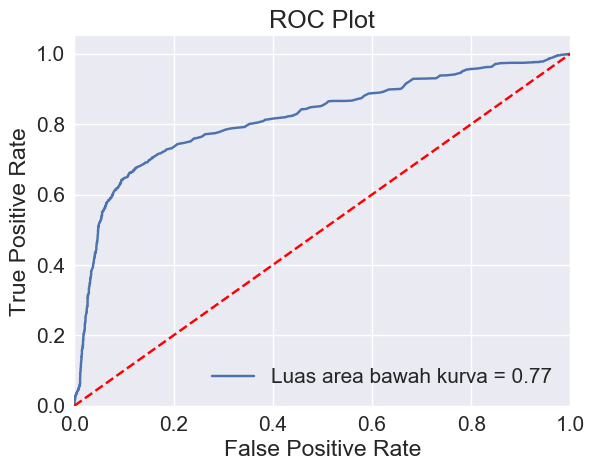

In [26]:
rocCurve(svm_clf,X_test,y_test,"Support Vector Machine")

Dengan validasi ROC curve, dapat kita ketahui bahwa model ini cukup lemah dalam mengklasifikasikan minoritas walaupun akurasinya cukup dapat diterima, SVM ini sementara menjadi model klasifier terpilih.

### Dimensional Reduction

### 1. Gradient Boosting

In [27]:
def gradBoost(X_train,y_train,X_test,y_test,learning_rates):
    # learning_rates = np.arange(0.74,.76,0.001)
    for learning_rate in learning_rates:
        boost = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
        boost.fit(X_train, y_train)
        print("Learning rate: ", learning_rate)
        print("Accuracy score for training data : {0:.3f}".format(boost.score(X_train, y_train)))
        print("Accuracy score for TEST set: {0:.3f}".format(boost.score(X_test, y_test)))

Here we created a gradBoost method that will help us tune hyperparameters of our Gradient Boosting Classifier while also fitting it and prinitng it's score based on the different learning rates. This will help us see what learning rate corresponds to the best model.

### 2. Voting Classifier

In [28]:
def votingClass(X_train,y_train,X_test,y_test):
    extra_trees_clf = ExtraTreesClassifier(random_state=42)
    mlp_clf = MLPClassifier(random_state=42)
    log_clf = LogisticRegression(random_state=42)
    rnd_clf = RandomForestClassifier(random_state=42)
    svm_clf = SVC(random_state=42)
    voting_clf = VotingClassifier(
        estimators=[('xt', extra_trees_clf), ('mlp', mlp_clf), ('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting='hard')
    voting_clf.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score
    for clf in (extra_trees_clf, log_clf, rnd_clf, svm_clf, voting_clf):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

We also made a Voting Classifier similat to the GradBoost one above to help tune parameters and get a better model.

## PCA Analysis

Pricincpal Compnent analysis will be used to emphasize variation and see patterns that are promient in the dataset.

In [29]:
from sklearn.decomposition import PCA, IncrementalPCA
model = PCA(n_components=2)   
model = model.fit(X)
print(model.components_)

[[ 0.99988467  0.00649994  0.00907099  0.00800532  0.00648258]
 [-0.0134126  -0.02164846  0.53842774  0.63028688  0.55873559]]


In [30]:
print(model.explained_variance_ratio_)

[0.96479757 0.02070787]


In [31]:
print(model.explained_variance_)

[77.0702701   1.65419299]


### PCA untuk Dimensionality Reduction

With PCA dimensionality reduction can be achieved by focusing as much of the data into the first principal components.

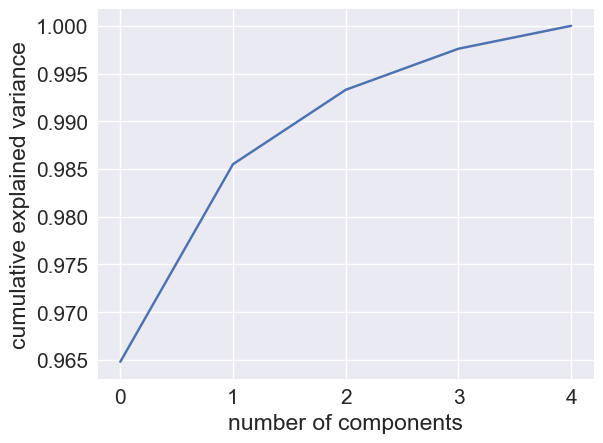

In [32]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

**Running classifiers on PCA transformed data**

For this experiment in the PCA analysis we will use our best classifiers to see if PCA can improve the prediction. Our best classifiers include gradient boosting and a voting classifier.

In [33]:
X_dim2 = model.transform(X)
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_dim2, y, test_size=.30)
learning_rates = np.arange(0.25,1.5,0.25)
gradBoost(X_train_PCA, y_train_PCA, X_test_PCA, y_test_PCA,learning_rates)

Learning rate:  0.25
Accuracy score for training data : 0.791
Accuracy score for TEST set: 0.790
Learning rate:  0.5
Accuracy score for training data : 0.793
Accuracy score for TEST set: 0.791
Learning rate:  0.75
Accuracy score for training data : 0.797
Accuracy score for TEST set: 0.794
Learning rate:  1.0
Accuracy score for training data : 0.795
Accuracy score for TEST set: 0.794
Learning rate:  1.25
Accuracy score for training data : 0.796
Accuracy score for TEST set: 0.793


In [34]:
votingClass(X_train_PCA, y_train_PCA, X_test_PCA, y_test_PCA)

ExtraTreesClassifier 0.7866880513231757
LogisticRegression 0.7371692060946271
RandomForestClassifier 0.7876904570970329
SVC 0.7947072975140337
VotingClassifier 0.7921010425020049


As we can see the best classifier for PCA is roughly either gradient boosting with a learning rate of .5 or our SVC inside the voting classifier getting values ranging roughly .78%. Also these results are very similar to the original data being tested on gradient boost and the voting classifier which means that the PCA was sucessful in determining the amount of components required to describe the data.

**Incremental PCA**

One problem with the preceding implementation of PCA is that it requires the whole training set to fit in memory. Incremental PCA (IPCA) can split the training set into mini-batches and is useful for large training sets, and also to apply PCA online. However the dataset is small enough that this is not required.

In [35]:
n_batches = 100
inc_pca = IncrementalPCA(n_components= 2)
X_copy = X
X_iPCA = model.fit_transform(X_copy)
for X_batch in np.array_split(X_copy, n_batches):
    inc_pca.partial_fit(X_batch) 
    X_iPCA = inc_pca.transform(X_copy)
print(X_iPCA.shape)

X_train_iPCA, X_test_iPCA, y_train_iPCA, y_test_iPCA = train_test_split(X_iPCA, y, test_size=.30)

gradBoost(X_train_iPCA, y_train_iPCA, X_test_iPCA, y_test_iPCA,learning_rates)

(16625, 2)
Learning rate:  0.25
Accuracy score for training data : 0.788
Accuracy score for TEST set: 0.787
Learning rate:  0.5
Accuracy score for training data : 0.793
Accuracy score for TEST set: 0.781
Learning rate:  0.75
Accuracy score for training data : 0.794
Accuracy score for TEST set: 0.779
Learning rate:  1.0
Accuracy score for training data : 0.793
Accuracy score for TEST set: 0.789
Learning rate:  1.25
Accuracy score for training data : 0.795
Accuracy score for TEST set: 0.783


In [36]:
votingClass(X_train_iPCA, y_train_iPCA, X_test_iPCA, y_test_iPCA)

ExtraTreesClassifier 0.7742582197273457
LogisticRegression 0.7371692060946271
RandomForestClassifier 0.7778668805132317
SVC 0.7914995990376904
VotingClassifier 0.7898957497995188


In conclusion, the two types of principal analysis components show that this dataset can be described fairly accurately with the data being reduced to two components. The random PCA performed the best out of the PCA methods.

### Menggabungkan Learning Methods dan Membuat Hyperparameter

### Voting Classifier

We will use a voting classifier to make better predictions, using "soft" voting and 5 classification methods. Soft voting returns an average of probabilities to choose a "winning" class.

In [37]:
def votingClass(X_train,y_train,X_test,y_test):
    extra_trees_clf = ExtraTreesClassifier(random_state=42)
    mlp_clf = MLPClassifier(random_state=42)
    log_clf = LogisticRegression(random_state=42)
    rnd_clf = RandomForestClassifier(random_state=42)
    svm_clf = SVC(random_state=42)
    voting_clf = VotingClassifier(
        estimators=[('xt', extra_trees_clf), ('mlp', mlp_clf), ('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting='hard')
    voting_clf.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score
    for clf in (extra_trees_clf, log_clf, rnd_clf, svm_clf, voting_clf):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

The classifiers chosen here are extra trees, logistic regression, random forest and support vector machine. In order to use soft voting, our support vector machine classification method will need to output probabilities.

## Soft Voting

In [38]:
#Soft voting classifier
votingClass(X_train,y_train,X_test,y_test)

ExtraTreesClassifier 0.7848837209302325
LogisticRegression 0.7359663191659984
RandomForestClassifier 0.7858861267040899
SVC 0.7985164394546913
VotingClassifier 0.7955092221331195


## Hard voting

We will experiment and see if we can obtain different results using "hard" voting. Hard voting is the simple case of "majority" voting.

In [39]:
def votingClassHard(X_train,y_train,X_test,y_test):
    extra_trees_clf = ExtraTreesClassifier(random_state=42)
    log_clf = LogisticRegression(random_state=42)
    rnd_clf = RandomForestClassifier(random_state=42)
    svm_clf = SVC(random_state=42)
    voting_clf = VotingClassifier(
        estimators=[('xt', extra_trees_clf), ('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting='hard')
    voting_clf.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score
    for clf in (extra_trees_clf, log_clf, rnd_clf, svm_clf, voting_clf):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


We are using the same classifiers here as in the last experiment for consistency. The support vector machine classifier is returned to its default probability state (false).

In [40]:
#Hard voting classifier
votingClassHard(X_train,y_train,X_test,y_test)

ExtraTreesClassifier 0.7848837209302325
LogisticRegression 0.7359663191659984
RandomForestClassifier 0.7858861267040899
SVC 0.7985164394546913
VotingClassifier 0.7862870890136328


There appears to be minimal differeneces in our results using either soft or hard voting. Support vector machine provides the best classification in both of these instances.

### Gradient Boosting
Metode pertama kita gunakan model Gradien Boosting dan tuning hyperparameternya dengan harapan mendapatkan hasil akurasi yang lebih baik.

Kita gunakan learning rate yang berbeda sehingga kita dapat menganalisa hyperparamete yang terbaik dengan learning rate berapa.

In [41]:
rates = [0.1, 0.25, 0.5, 0.75, 1, 1.5]

In [42]:
def gradBoost(X_train,y_train,X_test,y_test,learning_rates):
    # learning_rates = np.arange(0.74,.76,0.001)
    for learning_rate in learning_rates:
        boost = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
        boost.fit(X_train, y_train)
        print("Learning rate: ", learning_rate)
        print("Accuracy score for training data : {0:.3f}".format(boost.score(X_train, y_train)))
        print("Accuracy score for test set: {0:.3f}".format(boost.score(X_test, y_test)))

We print the accuracy of the Gradient Boosting Classifier via the training and testing data based on the different learning rates.

In [43]:
gradBoost(X_train,y_train,X_test,y_test,rates)

Learning rate:  0.1
Accuracy score for training data : 0.772
Accuracy score for test set: 0.772
Learning rate:  0.25
Accuracy score for training data : 0.792
Accuracy score for test set: 0.795
Learning rate:  0.5
Accuracy score for training data : 0.793
Accuracy score for test set: 0.795
Learning rate:  0.75
Accuracy score for training data : 0.794
Accuracy score for test set: 0.795
Learning rate:  1
Accuracy score for training data : 0.794
Accuracy score for test set: 0.796
Learning rate:  1.5
Accuracy score for training data : 0.788
Accuracy score for test set: 0.791


Dapat kita lihat bahwa GradBoost dengan learning rate sebesar 0.75 adalah model terbaik sejauh ini untuk digunakan.

## Bagging

This experiment with bagging uses 500 decision tree classifiers trained with 100 randomly sampled instances.

In [44]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7939053728949479


We are still hovering at the .79% prediction accuracy with this model.

### Stacking Regressor:

Implementation of a stacking regressor to determine the best classifier from our previous classifiers in this project.

In [45]:
# Stacking regressor
# Params: array of classifiers
class StackingRegressor:

    def __init__(self, classifiers=None):
        self.classifiers = classifiers

    def fit(self,X_train,y_train):
        # Takes an array of training data for both X and y
        for classifier in self.classifiers:
            classifier.fit(X_train,y_train)

    def predict(self,X_test):
        # Takes an array of X to compute a y_predict
        self.predict = list()
        for classifier in self.classifiers:
            self.predict.append(classifier.predict(X))
        return np.mean(self.predict, axis=0)

    def score(self,X_test,y_test):
        # Takes a X_test array, y_test array, and for each classifier it gets the score,
        # and then performs the mean of the list of scores as it returns.
        scores = []
        for classifier in self.classifiers:
            scores.append(classifier.score(X_test,y_test))
        return np.mean(scores, axis=0)
    
def classifierPCA():
    finalboost = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.25, max_depth = 2, random_state = 0)
    extra_trees_clf = ExtraTreesClassifier(random_state=42)
    mlp_clf = MLPClassifier(random_state=42)
    log_clf = LogisticRegression(random_state=42)
    rnd_clf = RandomForestClassifier(random_state=42)
    svm_clf = SVC(random_state=42)
    voting_clf = VotingClassifier(
        estimators=[('xt', extra_trees_clf), ('mlp', mlp_clf), ('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting='hard')
    voting_clf.fit(X_train, y_train)
    classes = [bag_clf,voting_clf,finalboost]
    return classes

In [46]:
# StackingRegressor with all non-dimensionality reduced data
finalboost = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.25, max_features=8, max_depth = 2, random_state = 0)
extra_trees_clf = ExtraTreesClassifier(random_state=42)
mlp_clf = MLPClassifier(random_state=42)
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
voting_clf = VotingClassifier(
    estimators=[('xt', extra_trees_clf), ('mlp', mlp_clf), ('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)
classes = [bag_clf,voting_clf,finalboost]
stackingReg = StackingRegressor(classes)

In [47]:
# PCA dimensionality reduced data in StackingRegressor
classes = classifierPCA()

stackingReg_PCA = StackingRegressor(classes)
stackingReg_PCA.fit(X_train_PCA,y_train_PCA)
stackingReg_PCA.score(X_test_PCA,y_test_PCA)

0.7906308473670142

In [48]:
stackingReg_iPCA = StackingRegressor(classes)
stackingReg_PCA.fit(X_train_iPCA,y_train_iPCA)
stackingReg_PCA.score(X_test_iPCA,y_test_iPCA)

0.7882919005613473

In [49]:
rnd_pca = PCA(n_components=5, svd_solver="randomized") 
X_rPCA = rnd_pca.fit_transform(X_copy)

X_train_rPCA, X_test_rPCA, y_train_rPCA, y_test_rPCA = train_test_split(X_rPCA, y, test_size=.30)

gradBoost(X_train_rPCA, y_train_rPCA, X_test_rPCA, y_test_rPCA,learning_rates)

Learning rate:  0.25
Accuracy score for training data : 0.801
Accuracy score for test set: 0.790
Learning rate:  0.5
Accuracy score for training data : 0.801
Accuracy score for test set: 0.787
Learning rate:  0.75
Accuracy score for training data : 0.803
Accuracy score for test set: 0.787
Learning rate:  1.0
Accuracy score for training data : 0.803
Accuracy score for test set: 0.789
Learning rate:  1.25
Accuracy score for training data : 0.801
Accuracy score for test set: 0.781


In [50]:
stackingReg_rPCA = StackingRegressor(classes)
stackingReg_rPCA.fit(X_train_rPCA,y_train_rPCA)
stackingReg_rPCA.score(X_test_rPCA,y_test_rPCA)

0.7882919005613473

### Final model

Seperti yang dapat dilihat, model PCA Stacking menjadi model dengan hasil yang paling baik dalam penyelesaiannya.Dan juga setelah proses reduksi dimesionalitas dataset cukup cepat dan membuktikan hasil yang lebih proper dengan PCA Dimensionality Reduction. 

Dipilihlah full data Stacking Regressor sebagai model terbaik.

### Menggunakan Data Testing dengan Model Terpilih (Fit with StackingReg)

In [54]:
astra_test.rename(columns={'TARGET': 'Default'}, inplace=True)
col = astra_test.loc[: , "BILL_AMT1":"BILL_AMT3"]
astra_test['RATA_BILL'] = col.mean(axis=1)
col2 = astra_test.loc[: , "PAY_AMT1":"PAY_AMT3"]
astra_test['RATA_PAY'] = col2.mean(axis=1)

In [55]:
Xpred = astra_test[["AGE","EDUCATION","PAY_1","PAY_2","PAY_3"]]
ypred = astra_test['Default']
stackingRegFinal = StackingRegressor(classes)
stackingRegFinal.fit(Xpred,ypred)

In [56]:
print("Accuracy score for test set: {0:.3f}".format(stackingRegFinal.score(Xpred,ypred)))

Accuracy score for test set: 0.800


### Kesimpulan

Model yang dapat kita pilih untuk digunakan setelah melalui pengecekan model, adalah model Stacking Regressor dengan akurasi terhadap data testing sebesar 80%